In [1]:
from pandas_datareader import data 
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import plotly.graph_objects as go
from sklearn.mixture import GaussianMixture


In [27]:
# In this clustering using S&P 500 stock dataset 
payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
first_table = payload[0]
second_table = payload[1]

df = first_table
symbols = df['Symbol'].values.tolist()
#print(symbols[:15])
names = df['Security'].values.tolist()
#print(names[:15])

dictA = dict(zip(names, symbols))

# Deleted null values for some stocks 
del dictA['Brown–Forman']
del dictA['Berkshire Hathaway']
del dictA['Automatic Data Processing']
del dictA['News Corp (Class A)']


#print(list(dictA.keys())[list(dictA.values()).index('NWSA')])

##top_100 = dict(list(dictA.items())[:10])


##df = web.DataReader(list(top_100.values()),'yahoo',start='2020-01-01',end='2021-07-5')
##print("done")

##df = df['Adj Close']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Symbols   501 non-null    object 
 1   Returns   501 non-null    float64
 2   Variance  501 non-null    float64
dtypes: float64(2), object(1)
memory usage: 11.9+ KB


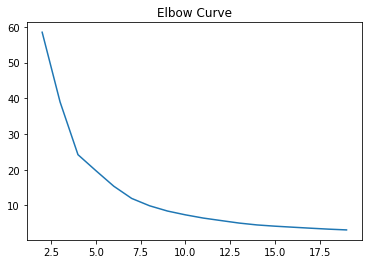

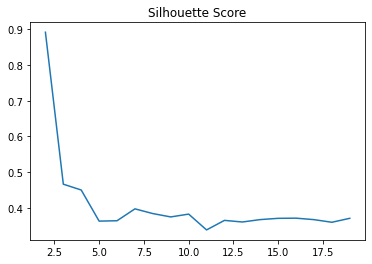

In [29]:
#df.to_csv('stock_200101_210705_500_AdjClose.csv')
df = pd.read_csv('stock_200101_210705.csv',index_col=0)
#print(df.head())
from math import sqrt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import RobustScaler
df.reset_index(drop=True)

#Calculating annual mean returns and variances
#returns = df.pct_change().mean() * 252
#variance = df.pct_change().std() * sqrt(252)

#df.columns = [''] * len(df.columns)
returns = df.pct_change().mean() 
variance = df.pct_change().std() 


#annual return. and annual varinace of all the SP-500
returns = ((1+ returns)**252)-1
#variance = variance*np.sqrt(252)
variance = variance*252**.5
#returns = df['Close'].pct_change().mean() 
#variance = df['Close'].pct_change().std() 

returns.columns = ["Returns"]
variance.columns = ["Variance"]
#Concatenating the returns and variances into a single data-frame
ret_var = pd.concat([returns, variance  ], axis = 1).dropna()
#ret_var = pd.concat([ret_var, ret_var.index ], axis = 1).dropna()
ret_var.columns = ["Returns","Variance"]

X = ret_var.values
#print(ret_var.index)
ret_var.reset_index(inplace=True)
ret_var = ret_var.rename(columns = {'index':'Symbols'})

ret_var.info()

#print(ret_var)
pd.set_option("display.max_rows", None, "display.max_columns", None)

sse = []
silhouette_score = []
for k in range(2,20):
    
    kmeans = KMeans(n_clusters=k,  random_state=10, n_init=10, max_iter=1000)
    kmeans.fit(X)
    #SSE for each n_clusters
    sse.append(kmeans.inertia_) 
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10))
    
plt.plot(range(2,20), sse)
plt.title("Elbow Curve")
plt.show()

plt.plot(range(2,20), silhouette_score)
plt.title("Silhouette Score")
plt.show()

#print(X)




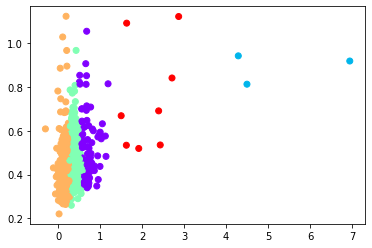

cluster Performance
-----------------------------------
Silhouette score: 0.36
SSE value withing cluster: 19.73
   cluster   Returns  Variance  Symbols
0        3  0.141934  0.437407      211
1        2  0.398870  0.454598      198
2        0  0.722187  0.533851       81
3        4  2.130394  0.750221        8
4        1  5.242566  0.891147        3

In the above data index 1 with cluster 2 has the highest return of 39.88% with lowest variance of 45.45%.


In [26]:
## Evaluated performance of various number of clusters using K-Means.
## Performance is evaluated by within cluster SSE and silhouette score.
kmeans = KMeans(5, random_state=10, n_init=100).fit(X)
centroids = kmeans.cluster_centers_

#print(X[:,0])
#print(X);
plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
 # set axes range
#plt.xlim(-0.2, 0.4)
#plt.ylim(-1, 1)
plt.show()


kmeans = KMeans(5, random_state=10, n_init=100)  
kmeans.fit(X) 
score = metrics.silhouette_score(X, kmeans.labels_, random_state=5)
sse = kmeans.inertia_

ret_var['cluster'] = kmeans.labels_
sse_within_cluster = kmeans.inertia_
print("cluster Performance")
print("-----------------------------------")
print("Silhouette score: " + str(score.round(2)))
print("SSE value withing cluster: " + str(round(sse, 2)))

#print(ret_var.dropna())

#creating clustered data

create_cluster_data = (
    ret_var
    .groupby('cluster')
    .agg({"Returns":"mean", "Variance":"mean", "Symbols":"count"})
    .sort_values('Returns')
    .reset_index()
)

print(create_cluster_data)
print("\nIn the above data index 1 with cluster 2 has the highest return of 39.88% with lowest variance of 45.45%.")


In [16]:
cluster_data = ret_var.query("cluster == 2").reset_index(drop=True)


In [17]:
print(cluster_data)

    Symbols   Returns  Variance  cluster
0       ABT  0.323937  0.350790        2
1      ABBV  0.306478  0.309024        2
2       ACN  0.385891  0.358083        2
3      ATVI  0.473811  0.358649        2
4       AAP  0.327247  0.412879        2
5       AES  0.408583  0.513992        2
6         A  0.529729  0.322393        2
7       APD  0.281473  0.383338        2
8      AKAM  0.298416  0.352934        2
9     GOOGL  0.590805  0.350280        2
10     AMZN  0.597351  0.342670        2
11      AXP  0.426748  0.546601        2
12      AWK  0.299354  0.372758        2
13      ABC  0.345651  0.375721        2
14      AME  0.323667  0.394710        2
15      ADI  0.420928  0.445815        2
16     ANSS  0.349036  0.433797        2
17     ANTM  0.337082  0.468341        2
18      AOS  0.412780  0.352570        2
19      ADM  0.315393  0.349930        2
20      AJG  0.396047  0.347902        2
21     ADSK  0.504483  0.450348        2
22      AZO  0.276097  0.364495        2
23      AVY  0.5

In [18]:

X= pd.concat([cluster_data['Returns'], cluster_data['Variance'] ], axis = 1).dropna()
X = X.values
#print(X)

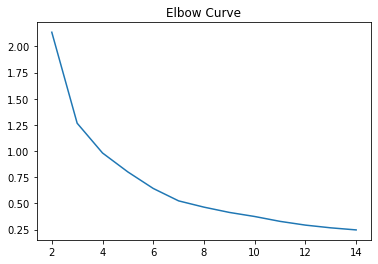

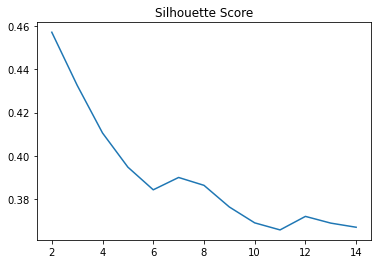

In [19]:
sse = []
silhouette_score = []
for k in range(2,15):
    
    #kmeans = KMeans(n_clusters = k)
    kmeans = KMeans(k, random_state=10, n_init=10)
    kmeans.fit(X)
    
    sse.append(kmeans.inertia_) #SSE for each n_clusters
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=5))
    
plt.plot(range(2,15), sse)
plt.title("Elbow Curve")
plt.show()

plt.plot(range(2,15), silhouette_score)
plt.title("Silhouette Score")
plt.show()


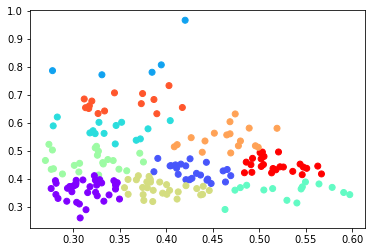

cluster Performance
-----------------------------------
silhouette score: 0.37
sse withing cluster: 0.36


In [20]:


kmeans = KMeans(10, random_state=10, n_init=100)  
kmeans.fit(X) 

plt.scatter(X[:,0],X[:,1], c = kmeans.labels_, cmap ="rainbow")
plt.show()


score = metrics.silhouette_score(X, kmeans.labels_, random_state=5)
sse = kmeans.inertia_
#df['cluster'] = kmeans.labels_

cluster_data['cluster'] = kmeans.labels_
#print(kmeans.labels_)
sse_within_cluster = kmeans.inertia_
print("cluster Performance")
print("-----------------------------------")
print("silhouette score: " + str(score.round(2)))
print("sse withing cluster: " + str(round(sse, 2)))
#print(cluster_data)


In [21]:
create_cluster_data = (
    cluster_data
    .groupby('cluster')
    .agg({"Returns":"mean", "Variance":"mean", "Symbols":"count"})
    .sort_values('Returns')
    .reset_index()
)

print("\nIn the above data index 9 with cluster 4 has the highest return of 53.09% with lowest variance of 35.43%")


In the above data index 9 with cluster 4 has the highest return of 53.09% with lowest variance of 35.43%


In [22]:
cluster_data = cluster_data.query("cluster == 4").reset_index(drop=True)

print(cluster_data)

   Symbols   Returns  Variance  cluster
0     ATVI  0.473811  0.358649        4
1        A  0.529729  0.322393        4
2    GOOGL  0.590805  0.350280        4
3     AMZN  0.597351  0.342670        4
4      BIO  0.578401  0.368593        4
5      DHR  0.540459  0.312800        4
6      DVA  0.479608  0.367791        4
7      DPZ  0.486427  0.376264        4
8      EFX  0.549655  0.388093        4
9     EXPD  0.463144  0.289527        4
10     EXR  0.504902  0.359256        4
11     JCI  0.546305  0.370489        4
12     MTD  0.545015  0.362953        4
13    MSFT  0.564216  0.380881        4
14    NDAQ  0.514377  0.364346        4


In [23]:
## With this analysis I found that cluster 2 as golden cluster.
## I Found the golden cluster in Second iteration.
## Conclusion: These stocks will provide higher returns with low variance. 
## So investing in these stocks will provide low risk and higher returns.